In [8]:
###  setting up the env.

In [4]:
!pip install theano

  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=9c729f46128292c15b24870c4443660a7d820a1a575a8b9d228f9283f1743b12
  Stored in directory: c:\users\vidya\appdata\local\pip\cache\wheels\84\cb\19\235b5b10d89b4621f685112f8762681570a9fa14dc1ce904d9
Successfully built theano


In [5]:
import numpy
import theano

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\vidya\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
!pip install keras

In [10]:
print(theano.__version__)

1.0.5


In [11]:
import tensorflow
import keras
print(keras.__version__)

2.4.3


In [16]:
print(tensorflow.__version__)

2.3.1


In [12]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [13]:
### image dataset MNIST

In [22]:
from keras.datasets import mnist

from matplotlib import pyplot as plt

In [37]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [32]:
### check the dimensions of the image

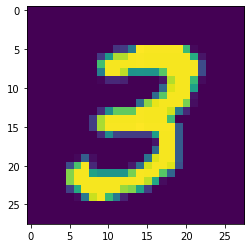

In [39]:
plt.imshow(x_train[7])


In [31]:
### adiing RGB depth to the image

In [28]:
x_train=x_train.reshape(x_train.shape[0],1,28,28)

In [30]:
x_test=x_test.reshape(x_test.shape[0],1,28,28)

In [33]:
print(x_train.shape)

(60000, 1, 28, 28)


In [34]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [42]:
y_train[:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [43]:
#np.utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.

In [44]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [49]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [50]:
# defining the model architecture

In [63]:
from tensorflow.keras.models import Sequential

keras.layers.Conv2D(filters, kernel_size, strides=(1, 1),
  padding='valid', data_format=None, dilation_rate=(1, 1),
  activation=None, use_bias=True, kernel_initializer='glorot_uniform',
  bias_initializer='zeros', kernel_regularizer=None,
  bias_regularizer=None, activity_regularizer=None,
  kernel_constraint=None, bias_constraint=None)

In [70]:
model=Sequential()
model.add(Convolution2D(32,3,3,activation='relu',input_shape=(1,28,28)))

ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 3, 3, 1], use_cudnn_on_gpu=true](conv2d_input, conv2d/Conv2D/ReadVariableOp)' with input shapes: [?,1,28,28], [3,3,28,32].